<a href="https://colab.research.google.com/github/RanjithKishore/colab/blob/master/fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install kaggle

In [2]:
%tensorflow_version 1.14

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ranjithkishoreav","key":"8f1933f71ec42d127b67b78312f7fa83"}'}

In [0]:
!mkdir -p  ~/.kaggle

In [0]:
!cp /content/kaggle.json ~/.kaggle

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle datasets download -d zalando-research/fashionmnist

 83% 57.0M/68.8M [00:02<00:00, 30.1MB/s]
100% 68.8M/68.8M [00:02<00:00, 31.8MB/s]


In [14]:
from zipfile import ZipFile
file_name='fashionmnist.zip'
with ZipFile(file_name,'r')as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
from __future__ import print_function,division
from builtins import range

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Using TensorFlow backend.


In [0]:
data=pd.read_csv('/content/fashion-mnist_train.csv')
data=data.to_numpy()
np.random.shuffle(data)

In [0]:
X=data[:,1:].reshape(-1,28,28,1)/255.0
Y=data[:,0].astype(np.int32)

In [0]:
K=len(set(Y))

In [0]:
import keras
Y=keras.utils.np_utils.to_categorical(Y)

In [0]:
model=Sequential()

In [22]:
model.add(Conv2D(input_shape=(28,28,1),filters=32,kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64,kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Conv2D(filters=128,kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=300))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']

)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [23]:
r=model.fit(X,Y,validation_split=0.33,epochs=15,batch_size=32)
print('Returned:',r)
print(r.history.keys())


Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 23s 561us/step - loss: 0.5007 - accuracy: 0.8180 - val_loss: 0.4606 - val_accuracy: 0.8345
Epoch 2/15
40199/40199 [==============================] - 16s 405us/step - loss: 0.3556 - accuracy: 0.8688 - val_loss: 0.3590 - val_accuracy: 0.8661
Epoch 3/15
40199/40199 [==============================] - 17s 414us/step - loss: 0.3056 - accuracy: 0.8866 - val_loss: 0.3533 - val_accuracy: 0.8717
Epoch 4/15
40199/40199 [==============================] - 17s 415us/step - loss: 0.2738 - accuracy: 0.8992 - val_loss: 0.4629 - val_accuracy: 0.8324
Epoch 5/15
40199/40199 [==============================] - 16s 410us/step - loss: 0.2469 - accuracy: 0.9086 - val_loss: 0.3827 - val_accuracy: 0.8648
Epoch 6/15
40199/40199 [==============================] - 17s 411us/step - loss: 0.2258 - accuracy: 0.9166 - val_loss: 0.3307 - val_accuracy: 0.8823
Epoch 7/15
40199/40199 [==============================]

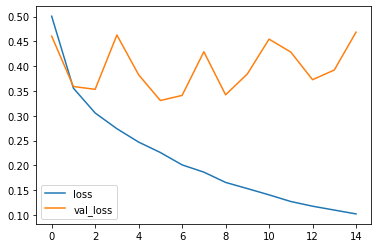

In [25]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

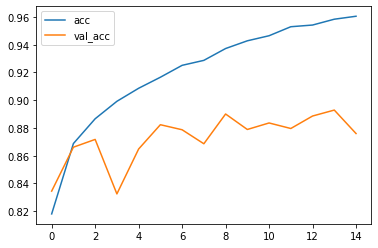

In [27]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()